In [1]:
import torch
import pandas as pd

from tqdm import tqdm
from boltons.iterutils import chunked_iter
from itertools import chain

from span_clf import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [3]:
model = torch.load('data/model3.p', map_location='cpu')

In [4]:
corpus = Corpus.load('data/corpus.p')

In [5]:
for spans in tqdm(chunked_iter(set(chain(*corpus.groups.values())), 1000)):
    model(spans)

14it [00:52,  3.75s/it]

KeyboardInterrupt: 

In [5]:
rows = []
for span, domain in tqdm(islice(corpus.train, 10000)):
    
    yp = model([span]).exp()
    pred = model.labels[yp.argmax().item()]
    weight = yp.max().item()
    
    rows.append((domain, span, pred, weight))

5600it [01:32, 55.17it/s]

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(rows, columns=('domain', 'span', 'pred', 'weight'))

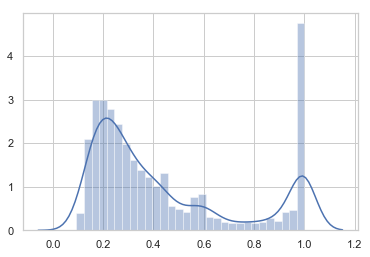

In [10]:
sns.distplot(weights, 30)

In [15]:
corpus.groups['bloomberg.com'][:10]

['putin is a',
 'competitor   not a foe  trump says ahead of summit',
 'brexit threatens equal pay protections  uk women s groups fear',
 'bloomberg lp diversity and inclusion',
 'small hedge funds seen quickest to drop research under mifid',
 'bloomberg professional services',
 'rep tim ryan',
 'inaugural address had  positive message ',
 'the daily prophet',
 'this rally in stocks has to end  right ']

In [1]:
from headline_parser import nlp, standardize_text

In [2]:
for row in read_json_gz_lines('data/cleaning-titles.json/'):
    if 'only an actual millennial can get' in row['title'].lower():
        print(row)

NameError: name 'read_json_gz_lines' is not defined

In [2]:
doc = nlp(standardize_text("Buzzfeed --- Only An Actual Millennial Can Get 100% On This Internet Acronym Quiz"))

In [3]:
[s._.clf_text for s in doc._.spans if s._.clf_text]

['buzzfeed',
 'only an actual millennial can get # % on this internet acronym quiz']

In [6]:
doc._.clf_token_texts

['only',
 'an',
 'actual',
 'millennial',
 'can',
 'get',
 '#',
 '%',
 'on',
 'this',
 'internet',
 'acronym',
 'quiz']